# WUM 2020: Projekt II, Milestone II

### Jakub Kosterna, Zuzanna Mróz & Aleksander Podsiad

Zanim przejdziemy do inżynierii cech, wczytajmy nasze dane i odtwórzmy to, do czego doszliśmy już ostatnio.

Pamiętajmy, że nasza cudowna ramka nie ma żadnych braków, co bardzo ułatwia sprawę.

Wpierw wczytajmy potrzebne pakiety do obróbki datasetu i jego oglądu wtrakcie i po modyfikacjach.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings

In [2]:
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv("online_shoppers_intention.csv")

In [4]:
random.seed(123)
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4039,0,0.000000,0,0.0,2,0.000000,0.200000,0.200000,0.000000,0.0,May,2,2,5,13,Returning_Visitor,False,False
2029,0,0.000000,0,0.0,2,0.000000,0.200000,0.200000,0.000000,0.0,Mar,2,4,1,1,Returning_Visitor,False,False
3662,0,0.000000,0,0.0,2,19.000000,0.000000,0.100000,0.000000,0.0,May,1,1,3,3,Returning_Visitor,False,False
3493,2,256.000000,0,0.0,14,574.500000,0.000000,0.014286,0.000000,0.0,May,3,3,8,11,New_Visitor,False,False
3880,7,96.000000,3,313.0,65,2091.662821,0.012207,0.030146,6.147634,0.0,May,3,2,3,4,Returning_Visitor,True,False
12188,7,533.591353,4,333.5,85,5496.630355,0.010193,0.025284,5.145929,0.0,Nov,3,2,1,13,Returning_Visitor,False,False
7748,5,96.600000,0,0.0,68,2664.416667,0.000000,0.005634,5.150260,0.0,Sep,4,2,1,5,New_Visitor,True,False
11318,0,0.000000,0,0.0,37,5208.650000,0.000000,0.018299,0.000000,0.0,Nov,2,2,1,6,Returning_Visitor,False,False
7684,0,0.000000,1,6.0,65,2349.101818,0.018786,0.046505,0.000000,0.0,Jul,2,2,2,3,Returning_Visitor,False,False
7396,4,45.700000,1,0.0,13,94.600000,0.041667,0.070671,0.000000,0.0,Jul,3,2,2,4,Returning_Visitor,False,True


Ciągle te same dane - wspaniale!

In [5]:
df.shape

(12330, 18)

# Inżynieria cech

Przed nami ekscytująca podróż po wnikliwej analizie 18 kolumn. Niech się dzieje!

## Encoding

Okey, przyjrzyjmy się po kolei naszym kolumnom i poreflektujmy nad każdą z nich.

### Month

Wpierw zróbmy porządek z miesiącami - tutaj sprawa prosta: zwyczajnie przekonwertujemy ich słowne skróty na numery im odpowiadające (styczeń - 1, luty - 2, itd).

In [6]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i in range(len(months)):
    df[['Month']] = df[['Month']].replace(months[i], i + 1)
df[['Month']].sample(5)

,Month
8871,12
12151,11
11281,11
630,3
11646,11


### Administrative, Informational & ProductRelated

Trzy ważne features mówiące o liczbie stron trzech różnych typów, na które wchodzili internauci przy okazji witryny z kupnem produktu. Jak prezentują się ich wartości?

In [7]:
df.Administrative.value_counts().reset_index()

,index,Administrative
0,0,5768
1,1,1354
2,2,1114
3,3,915
4,4,765
5,5,575
6,6,432
7,7,338
8,8,287
9,9,225


In [8]:
df.Informational.value_counts().reset_index()

,index,Informational
0,0,9699
1,1,1041
2,2,728
3,3,380
4,4,222
5,5,99
6,6,78
7,7,36
8,9,15
9,8,14


In [9]:
df.ProductRelated.value_counts().reset_index()

,index,ProductRelated
0,1,622
1,2,465
2,3,458
3,4,404
4,6,396
...,...,...
306,377,1
307,385,1
308,292,1
309,409,1


In [10]:
df.ProductRelated.nunique()

311

Biorąc pod uwagę cel naszego projektu, mimo posiadania skończonej liczby wartości dla tych trzech kolumn odpowiadających za liczbę stron danych typów, na które weszli użytkownicy, zdecydowanie mamy przydatną informację... ale zauważmy, że nie ma dużej różnicy czy klient odwiedził 305 czy 306 stron związanych z produktem. Aby użytkowników o podobnej liczbie "zlać w jedno" i otrzymać potencjalnie podział mówiący bardziej sam za siebie, możemy te trzy kolumny zastąpić trzema nowymi features. *AdministrativeResMan*, *InformationalResMan* i *ProductRelatedResMan* będą zawierać liczby przybliżające informację o tym, jak bardzo klient wnikliwie przeszukiwał inne witryny. Kolejne liczby będą odpowiadać wcześniejszym wartościom kolejno:

*AdministrativeResMan*: 0 - (0), 1 - (1-4), 2 - (5-9), 3 - (10-14), 4 - (15-18), 5 - (19-26)

*InformationalResMan*: 0 - (0), 1 - (1-2), 2 - (3-4), 3 - (5-7), 4 - (8-10), 5 - (11-16)

*ProductRelatedResMan*: 0 - (0), 1 - (1-9), 2 - (10-29), 3 - (30-44), 4 - (45-84), 5 - (85-310)

Wskaźnik *ResMan* to nasza autorska miara, która informuje o stopniu bycia tzw. *Research maniac* użytkownika. Jak można się spodziewać, wynik 0 tego wskaźnika oznacza absolutny brak zainteresowania internauty konkretnym rodzajem strony, 1 małe zainteresowanie, 2 umiarkowane, 3 średnie, 4 solidne i 5 maniakalne.

Liczby zostały dobrane na podstawie liczb odwiedzeń stron danych kategorii.

In [11]:
df['AdministrativeResMan']=df['Administrative']
df['InformationalResMan']=df['Informational']
df['ProductRelatedResMan']=df['ProductRelated']

In [12]:
df.loc[(df['Administrative']>=1) & (df['Administrative']<=4), 'AdministrativeResMan'] = 1
df.loc[(df['Administrative']>=5) & (df['Administrative']<=9), 'AdministrativeResMan'] = 2
df.loc[(df['Administrative']>=10) & (df['Administrative']<=14), 'AdministrativeResMan'] = 3
df.loc[(df['Administrative']>=15) & (df['Administrative']<=18), 'AdministrativeResMan'] = 4
df.loc[(df['Administrative']>=19), 'AdministrativeResMan'] = 5

In [13]:
df.loc[(df['Informational']>=1) & (df['Informational']<=9), 'InformationalResMan'] = 1
df.loc[(df['Informational']>=3) & (df['Informational']<=4), 'InformationalResMan'] = 2
df.loc[(df['Informational']>=5) & (df['Informational']<=7), 'InformationalResMan'] = 3
df.loc[(df['Informational']>=8) & (df['Informational']<=10), 'InformationalResMan'] = 4
df.loc[(df['Informational']>=11), 'InformationalResMan'] = 5

In [14]:
df.loc[(df['ProductRelated']>=1) & (df['ProductRelated']<=9), 'ProductRelatedResMan'] = 1
df.loc[(df['ProductRelated']>=10) & (df['ProductRelated']<=29), 'ProductRelatedResMan'] = 2
df.loc[(df['ProductRelated']>=30) & (df['ProductRelated']<=44), 'ProductRelatedResMan'] = 3
df.loc[(df['ProductRelated']>=45) & (df['ProductRelated']<=84), 'ProductRelatedResMan'] = 4
df.loc[(df['ProductRelated']>=85), 'ProductRelatedResMan'] = 5

In [15]:
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,AdministrativeResMan,InformationalResMan,ProductRelatedResMan
30,0,0.000000,0,0.0,2,35.000000,0.000000,0.100000,0.000000,0.0,...,1,1,6,3,Returning_Visitor,False,False,0,0,1
7909,0,0.000000,0,0.0,62,3564.590227,0.021980,0.052176,0.000000,0.0,...,3,2,4,2,Returning_Visitor,False,False,0,0,4
5294,0,0.000000,0,0.0,17,465.666667,0.000000,0.005098,0.000000,0.0,...,3,2,1,2,Returning_Visitor,False,False,0,0,2
7818,4,97.800000,0,0.0,53,1228.289524,0.023457,0.042027,0.000000,0.0,...,1,1,2,3,Returning_Visitor,False,False,1,0,4
8506,3,171.000000,0,0.0,31,441.136905,0.000000,0.008824,0.000000,0.0,...,2,2,1,20,Returning_Visitor,False,False,1,0,3
805,0,0.000000,0,0.0,3,0.000000,0.200000,0.200000,0.000000,0.0,...,3,2,6,3,Returning_Visitor,False,False,0,0,1
3062,1,26.000000,2,33.0,6,64.000000,0.000000,0.022222,0.000000,0.2,...,1,1,3,4,Returning_Visitor,False,False,1,1,1
2624,0,0.000000,0,0.0,9,531.000000,0.000000,0.011111,0.000000,0.8,...,4,1,1,2,Returning_Visitor,False,False,0,0,1
7377,16,825.940018,1,120.8,109,2110.422354,0.005178,0.014937,2.491316,0.0,...,2,2,7,1,Returning_Visitor,False,False,4,1,5
2377,0,0.000000,0,0.0,5,210.000000,0.160000,0.173333,0.000000,0.4,...,1,1,1,3,Returning_Visitor,False,False,0,0,1


Mając przygotowane nowe miary, nie będą nam już potrzebne te oryginalne.

In [16]:
df = df.drop('Administrative', axis = 1)
df = df.drop('Informational', axis = 1)
df = df.drop('ProductRelated', axis = 1)

### VisitorType

Co w przypadku *VisitorType*? Na pewno wartości *Returning_Visitor* to coś absolutnie przeciwnego do *New_visitor*. Natomiast w przypadku *Other* sprawa jest już nieco badziej nieoczywista i może być to związane np. z brakiem lub niepewnością danej. Dlatego też w tym wypadku zastosujemy *binary encoding*, korzystając z dwóch dodatkowych feaures, gdzie wartość *returning* przyjmie 0 i 1, *new* - 1 i 0, zaś *other* - 0 i 0.

In [17]:
df.loc[(df['VisitorType']=='New_Visitor'), 'VisitorType0'] = 1
df.loc[(df['VisitorType']=='New_Visitor'), 'VisitorType1'] = 0
df.loc[(df['VisitorType']=='Returning_Visitor'), 'VisitorType0'] = 0
df.loc[(df['VisitorType']=='Returning_Visitor'), 'VisitorType1'] = 1
df.loc[(df['VisitorType']=='Other'), 'VisitorType0'] = 0
df.loc[(df['VisitorType']=='Other'), 'VisitorType1'] = 0

df = df.drop('VisitorType', axis = 1)

In [18]:
df.sample(10)

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,AdministrativeResMan,InformationalResMan,ProductRelatedResMan,VisitorType0,VisitorType1
11170,0.000000,0.00,953.666667,0.026667,0.071111,0.000000,0.0,12,2,2,2,1,False,False,0,0,3,0.0,1.0
8417,156.607143,156.75,2694.507143,0.000000,0.009091,0.000000,0.0,11,2,4,1,2,False,True,2,3,4,0.0,1.0
6091,0.000000,0.00,111.600000,0.000000,0.016667,24.918455,0.0,10,1,2,3,2,True,True,0,0,1,0.0,1.0
652,47.000000,0.00,825.083333,0.000000,0.009091,10.792951,0.0,3,2,2,2,2,False,True,1,0,2,1.0,0.0
9291,269.041667,64.50,6400.430101,0.006968,0.017557,4.213364,0.0,11,1,1,1,1,False,True,2,2,5,0.0,1.0
11422,113.500000,0.00,1344.340476,0.000000,0.005405,11.779090,0.0,12,2,2,3,2,False,True,1,0,3,1.0,0.0
6383,0.000000,69.00,352.875000,0.000000,0.055556,0.000000,0.0,8,2,2,3,2,False,False,1,2,2,0.0,1.0
3933,0.000000,0.00,200.000000,0.000000,0.050000,0.000000,0.0,5,3,2,1,4,True,False,0,0,1,0.0,1.0
10927,397.630952,88.50,6449.457197,0.010354,0.031511,5.391767,0.0,11,2,2,9,1,False,True,2,1,5,0.0,1.0
5230,0.000000,0.00,359.000000,0.000000,0.075000,0.000000,0.4,5,1,1,3,3,False,False,0,0,1,0.0,1.0


### Weekend  & Revunue

Tutaj po prostu pozamieniamy wartości False/True na 0/1.

In [19]:
df.loc[(df['Weekend']==False), 'Weekend'] = 0
df.loc[(df['Weekend']==True), 'Weekend'] = 1

In [20]:
df.loc[(df['Revenue']==False), 'Revenue'] = 0
df.loc[(df['Revenue']==True), 'Revenue'] = 1

In [21]:
df['VisitorType0'] = df['VisitorType0'].astype(object)
df['VisitorType1'] = df['VisitorType1'].astype(object)
df['Revenue'] = df['Revenue'].astype(object)
df['Weekend'] = df['Weekend'].astype(object)

In [22]:
df.sample(10)

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,AdministrativeResMan,InformationalResMan,ProductRelatedResMan,VisitorType0,VisitorType1
6572,72.60,0.0,544.100000,0.000000,0.002000,0.000000,0.0,9,2,2,9,2,0,0,1,0,2,1,0
1348,0.00,0.0,279.000000,0.000000,0.040000,0.000000,0.0,3,2,2,2,1,0,0,0,0,1,0,1
7732,216.60,0.0,937.865349,0.040351,0.069414,0.000000,0.0,10,3,2,6,1,1,0,1,0,3,0,1
6060,134.36,0.0,568.968333,0.017391,0.021615,12.392043,0.0,9,1,2,6,2,1,1,2,0,2,0,1
11844,10.00,19.0,845.833333,0.004000,0.022000,0.000000,0.0,12,1,1,4,3,1,0,1,1,2,0,1
10484,8.00,0.0,636.583333,0.000000,0.006250,0.000000,0.0,12,3,2,1,2,0,0,1,0,3,1,0
8528,0.00,0.0,214.333333,0.000000,0.050000,0.000000,0.0,11,1,1,9,3,0,0,0,0,1,0,1
2123,23.00,0.0,91.000000,0.000000,0.012500,0.000000,0.0,5,2,2,6,18,1,0,1,0,1,0,1
10393,0.00,0.0,251.291667,0.000000,0.011111,0.000000,0.0,11,3,2,2,11,1,0,0,0,2,0,1
5061,0.00,0.0,310.000000,0.028571,0.064286,0.000000,0.2,5,2,4,1,3,0,0,0,0,2,0,1


### Administrative_Duration, Informational_Duration & ProductRelated_Duration

Zróbmy jeszcze operacje z features odpowiadającymi za długości analogiczne do kolumn reprezentujących ilość wizyt na stronach danych kategorii. Przypomnijmy rozkłady *Administrative_Duration*, *Informational_Duration* i *ProductRelated_Duration*.

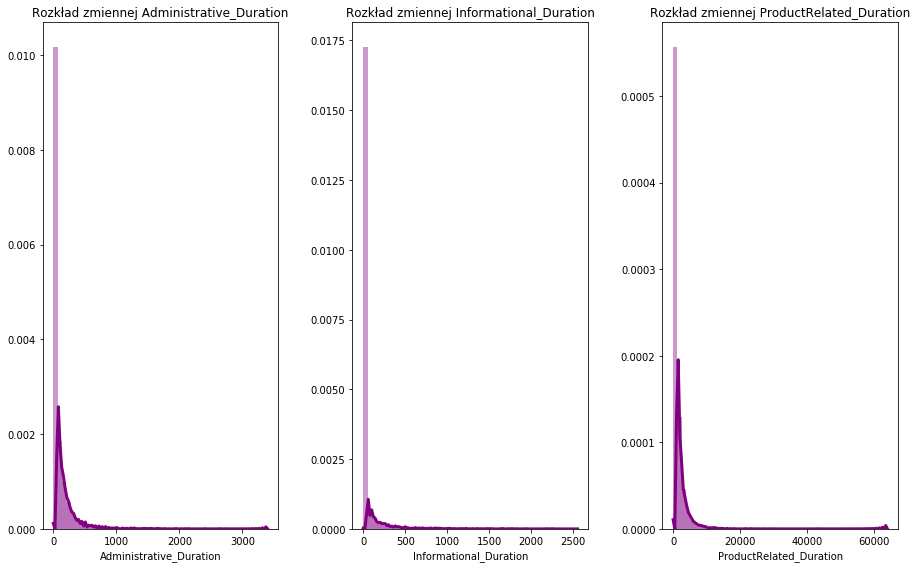

In [23]:
duration_columns = ('Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration')

f, axes = plt.subplots(1, 3, figsize=(13, 8))

for i in range(0, len(duration_columns)):
    sns.distplot(df[duration_columns[i]].dropna(), color="purple", 
                 hist=True, kde=True, kde_kws={'shade': True, 'linewidth': 3, 'bw': 1},
                 ax=axes[i]).set_title('Rozkład zmiennej '+ duration_columns[i])

plt.tight_layout();

Absolutna większość użytkowników spędza malutki czas w stosunku do najdłuższego pobytu ogólnie.

Przyjrzyjmy się wartościom centylowym tych długości dla kolejnych wielokrotności 5.

In [24]:
df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].quantile([x*0.05 + 0.05 for x in range(20)])

,Administrative_Duration,Informational_Duration,ProductRelated_Duration
0.05,0.000000,0.000,0.000000
0.10,0.000000,0.000,36.000000
0.15,0.000000,0.000,77.000000
0.20,0.000000,0.000,129.000000
0.25,0.000000,0.000,184.137500
0.30,0.000000,0.000,246.980000
0.35,0.000000,0.000,317.094167
0.40,0.000000,0.000,402.117216
0.45,0.000000,0.000,493.308221
0.50,7.500000,0.000,598.936905


I co my tu mamy?

* dla *Administrative_Duration* rzeczywiście mamy dosyć niezrównoważony rozkład - możemy więc danym czasom przypisać ich wartości centylowe.

In [25]:
df[['AdministrativeDurPerc']] = df[['Administrative_Duration']]

In [26]:
from scipy import stats
for i in range(len(df[['Administrative_Duration']])):
    df['AdministrativeDurPerc'][i] = stats.percentileofscore(df[['Administrative_Duration']], df['Administrative_Duration'][i])

In [27]:
df[['AdministrativeDurPerc']].sample(10)

,AdministrativeDurPerc
1364,23.941606
10473,23.941606
4505,91.808597
1976,23.941606
3854,23.941606
7340,98.110300
9293,80.608273
7156,67.485807
11738,75.701541
1018,23.941606


In [28]:
df = df.drop('Administrative_Duration', axis = 1)

Dalej

* dla *Informational_Duration* w większości mamy użytkowników, którzy na stronę tego typu nie wchodzą wcale. Ci zaś, którzy ją odwiedzają, siedzą na niej najczęściej do paru minut - można więc wnioskować, że trafiają tam z przypadku bądź aby szybko coś sprawdzić. Prawdziwa śmietanka to Ci, którzy siedzą tam dłużej niż 3 minuty - takich jest zaledwie kilka procent. Dlatego też, zastosujemy encoding, w którym tym pierwszym przypiszemy wartość 0, drugim 1, a trzecim - 2.

In [29]:
df.loc[(df['Informational_Duration'] > 0) & (df['Informational_Duration'] <= 180), 'Informational_Duration'] = 1
df.loc[(df['Informational_Duration'] > 180), 'Informational_Duration'] = 2

In [30]:
df[['Informational_Duration']].sample(10)

,Informational_Duration
10346,0.0
11585,0.0
6174,0.0
7660,0.0
10053,0.0
10896,0.0
4259,0.0
2307,0.0
722,2.0
2432,0.0


* dla *ProductRelated_Duration* sytuacja ma się podobnie jak dla *Administrative_Duration* - również i tutaj wartościom przypiszemy ich percentyle.

In [31]:
df[['ProductRelatedDurPerc']] = df[['ProductRelated_Duration']]

In [32]:
from scipy import stats
for i in range(len(df[['ProductRelated_Duration']])):
    df['ProductRelatedDurPerc'][i] = stats.percentileofscore(df[['ProductRelated_Duration']], df['ProductRelated_Duration'][i])

In [33]:
df[['ProductRelatedDurPerc']].sample(10)

,ProductRelatedDurPerc
873,46.082725
2513,3.065693
5841,75.231144
4155,51.086780
12285,93.998378
7571,32.376318
1958,92.546634
9315,72.522303
10884,56.423358
11606,75.263585


In [34]:
df = df.drop('ProductRelated_Duration', axis = 1)

In [35]:
df.rename(columns = {'Informational_Duration': 'InformationalDurRate'}, inplace = True)
df.sample(10)

,InformationalDurRate,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,AdministrativeResMan,InformationalResMan,ProductRelatedResMan,VisitorType0,VisitorType1,AdministrativeDurPerc,ProductRelatedDurPerc
752,0.0,0.000000,0.013333,52.108182,0.0,3,2,2,1,2,0,1,2,0,2,0,1,85.815085,63.154907
2393,0.0,0.200000,0.200000,0.000000,0.8,5,2,2,4,13,0,0,0,0,1,0,1,23.941606,3.065693
7086,1.0,0.000000,0.011448,8.052496,0.0,7,2,2,3,3,0,0,2,2,4,0,1,76.715328,49.626926
2606,1.0,0.021289,0.041499,0.000000,0.6,5,1,1,3,2,0,0,3,2,3,0,1,96.504461,84.306569
216,0.0,0.000000,0.066667,0.000000,0.0,3,1,2,7,3,0,0,1,0,1,0,1,79.497161,10.636659
12012,0.0,0.200000,0.200000,0.000000,0.0,12,2,2,5,2,1,0,0,0,1,0,1,23.941606,3.065693
4731,0.0,0.000000,0.020833,0.000000,0.6,5,2,5,1,4,0,0,0,0,2,0,1,23.941606,69.748581
8208,0.0,0.000000,0.008602,0.000000,0.0,11,2,2,2,6,0,0,0,0,3,0,1,23.941606,84.841849
3915,0.0,0.000000,0.026415,0.000000,0.4,5,2,2,3,6,0,0,0,0,4,0,1,23.941606,76.536902
7847,0.0,0.200000,0.200000,0.000000,0.0,6,3,2,3,13,0,0,0,0,1,0,1,23.941606,3.065693


### BounceRates, ExitRates & SpecialDay

Dyskusyjne jest to, co można z nimi zrobić - postanowiliśmy jednak zaufać przygotowanym miarom i tym, że dane wyliczone liczby są mądrze przekminione.

### PageValues

Zobaczmy centyle i rozkład owej kolumny.

In [36]:
df[['PageValues']].quantile([x*0.05 + 0.05 for x in range(20)])

,PageValues
0.05,0.000000
0.10,0.000000
0.15,0.000000
0.20,0.000000
0.25,0.000000
0.30,0.000000
0.35,0.000000
0.40,0.000000
0.45,0.000000
0.50,0.000000


Również mamy tutaj dosyć nieregularny rozkład, gdzie absolutna większość wartości jest bliska zeru - choć jest i parę bardzo dużych wartości. W tym wypadku zdecydowaliśmy się na **procedurę standaryzacji**.

In [37]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
df[['PageValues']] = scaler.fit_transform(df[['PageValues']])

In [38]:
df[['PageValues']].sample(10)

,PageValues
9783,-0.317178
7161,-0.317178
4715,-0.317178
3966,1.342118
1744,-0.317178
1736,-0.317178
2303,-0.317178
10924,-0.317178
7509,-0.317178
11404,-0.317178


### OperatingSystems, Browser, Region & TrafficType

I ostatnie kolumny, którymi się zajmiemy - tutaj dla każdej z nich mamy kilka-kilkanaście wartości, gdzie do końca właściwie nie wiemy, co kolejne numery reprezentują - z wyjątkiem tego, że jedne factory pojawiają się zdecydowanie częściej niż inne.

In [39]:
df[['OperatingSystems', 'Browser', 'Region', 'TrafficType']].nunique()

OperatingSystems     8
Browser             13
Region               9
TrafficType         20
dtype: int64

Biorąc pod uwage, że mamy tutaj jednak niepowiązane ze sobą kategorie, a nie jakikolwiek sensowny numeryczny porządek, dla nich z tego względu zdecydowaliśmy się na **OneHotEncoding**.

In [40]:
oper = np.array(df[["OperatingSystems"]])
brow = np.array(df[["Browser"]])
reg = np.array(df[["Region"]])
traf = np.array(df[["TrafficType"]])

from sklearn.preprocessing import LabelEncoder

leOper = LabelEncoder()
leBrow = LabelEncoder()
leReg = LabelEncoder()
leTraf = LabelEncoder()
operIntEnc = leOper.fit_transform(oper)
browIntEnc = leBrow.fit_transform(brow)
regIntEnc = leReg.fit_transform(reg)
trafIntEnc = leTraf.fit_transform(traf)

In [41]:
from sklearn.preprocessing import OneHotEncoder

operOnehotEncoder = OneHotEncoder(sparse=False)
browOnehotEncoder = OneHotEncoder(sparse=False)
regOnehotEncoder = OneHotEncoder(sparse=False)
trafOnehotEncoder = OneHotEncoder(sparse=False)

operIntEnc = operIntEnc.reshape(len(operIntEnc), 1)
browIntEnc = browIntEnc.reshape(len(browIntEnc), 1)
regIntEnc = regIntEnc.reshape(len(regIntEnc), 1)
trafIntEnc = trafIntEnc.reshape(len(trafIntEnc), 1)

operOnehotEncoded = operOnehotEncoder.fit_transform(operIntEnc)
browOnehotEncoded = browOnehotEncoder.fit_transform(browIntEnc)
regOnehotEncoded = regOnehotEncoder.fit_transform(regIntEnc)
trafOnehotEncoded = trafOnehotEncoder.fit_transform(trafIntEnc)
print(operOnehotEncoded.shape)

# invert 
#inverted = onehot_encoder.inverse_transform(onehot_encoded)
#print(inverted.transpose())

(12330, 8)


In [42]:
pd.DataFrame(operOnehotEncoded)

,0,1,2,3,4,5,6,7
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
12325,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12326,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12327,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12328,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
pd.DataFrame(operOnehotEncoded).columns

RangeIndex(start=0, stop=8, step=1)

In [44]:
['OperatingSystems' + str(col) for col in pd.DataFrame(operOnehotEncoded).columns]

['OperatingSystems0',
 'OperatingSystems1',
 'OperatingSystems2',
 'OperatingSystems3',
 'OperatingSystems4',
 'OperatingSystems5',
 'OperatingSystems6',
 'OperatingSystems7']

In [45]:
dfOperOnehot = pd.DataFrame(operOnehotEncoded)
dfBrowOnehot = pd.DataFrame(browOnehotEncoded)
dfRegOnehot = pd.DataFrame(regOnehotEncoded)
dfTrafOnehot = pd.DataFrame(trafOnehotEncoded)

dfOperOnehot.columns = ['OperatingSystems' + str(col) for col in pd.DataFrame(operOnehotEncoded).columns]
dfBrowOnehot.columns = ['Browser' + str(col) for col in pd.DataFrame(browOnehotEncoded).columns]
dfRegOnehot.columns = ['Region' + str(col) for col in pd.DataFrame(regOnehotEncoded).columns]
dfTrafOnehot.columns = ['TrafficType' + str(col) for col in pd.DataFrame(trafOnehotEncoded).columns]

In [46]:
dfOperOnehot.sample(10)

,OperatingSystems0,OperatingSystems1,OperatingSystems2,OperatingSystems3,OperatingSystems4,OperatingSystems5,OperatingSystems6,OperatingSystems7
6211,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11070,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4363,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
775,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6443,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8166,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3102,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8240,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df = pd.concat([df, dfOperOnehot, dfBrowOnehot, dfRegOnehot, dfTrafOnehot], axis = 1)
df.sample(10)

,InformationalDurRate,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,...,TrafficType10,TrafficType11,TrafficType12,TrafficType13,TrafficType14,TrafficType15,TrafficType16,TrafficType17,TrafficType18,TrafficType19
4813,1.0,0.000000,0.015385,-0.317178,0.0,5,3,2,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11596,0.0,0.003114,0.018562,-0.282075,0.0,11,2,2,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8076,0.0,0.000000,0.010000,-0.317178,0.0,11,2,2,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1540,0.0,0.000000,0.010256,-0.317178,0.0,3,2,2,1,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
218,0.0,0.016667,0.075000,-0.317178,0.0,3,2,2,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5511,0.0,0.000000,0.009470,0.139575,0.0,8,1,1,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11402,0.0,0.080000,0.126667,-0.317178,0.0,11,2,10,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10823,0.0,0.000000,0.003774,-0.317178,0.0,12,2,2,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11048,0.0,0.000000,0.029630,-0.317178,0.0,12,3,2,3,11,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2439,0.0,0.000000,0.007407,-0.317178,0.0,5,4,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df.shape

(12330, 69)

In [49]:
df = df.drop(['OperatingSystems', 'Browser', 'Region', 'TrafficType'], axis = 1)
df.sample(10)

,InformationalDurRate,BounceRates,ExitRates,PageValues,SpecialDay,Month,Weekend,Revenue,AdministrativeResMan,InformationalResMan,...,TrafficType10,TrafficType11,TrafficType12,TrafficType13,TrafficType14,TrafficType15,TrafficType16,TrafficType17,TrafficType18,TrafficType19
4756,0.0,0.100000,0.108333,-0.317178,0.0,5,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10311,0.0,0.000000,0.018571,-0.317178,0.0,11,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
833,0.0,0.000000,0.010000,-0.317178,0.0,3,1,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2121,0.0,0.000000,0.080000,-0.317178,0.6,5,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11681,0.0,0.200000,0.200000,-0.317178,0.0,11,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3293,0.0,0.000000,0.009929,1.334414,0.0,5,0,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11357,0.0,0.000000,0.100000,-0.317178,0.0,11,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8249,0.0,0.085714,0.114286,-0.317178,0.0,11,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7654,1.0,0.004255,0.046809,0.260411,0.0,7,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9977,0.0,0.000000,0.013333,-0.317178,0.0,12,0,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Normalizacja

Mamy już dobrze wyznaczone wartości dla kolejnych kolumn. Biorąc ramkę danych zbiorczo, warto by jednak było, by każda kolumna miała wejściowo takie samo znaczenie - zastosujemy więc standardową normalizację, w celu zachowania wszystkich wartości w przedziale <0; 1>.

In [50]:
df = (df-df.min())/(df.max()-df.min())

In [51]:
df.sample(10)

,InformationalDurRate,BounceRates,ExitRates,PageValues,SpecialDay,Month,Weekend,Revenue,AdministrativeResMan,InformationalResMan,...,TrafficType10,TrafficType11,TrafficType12,TrafficType13,TrafficType14,TrafficType15,TrafficType16,TrafficType17,TrafficType18,TrafficType19
10277,0.0,0.047619,0.214286,0.036297,0.0,0.9,0,0,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6607,0.5,0.015693,0.045610,0.016216,0.0,0.4,0,0,0.4,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278,0.0,0.000000,0.125000,0.000000,0.0,0.1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.000000,0.045455,0.000000,0.0,0.6,0,0,0.2,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1674,0.0,0.000000,0.062500,0.000000,0.0,0.1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10965,0.0,0.000000,0.333333,0.000000,0.0,1.0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10087,0.5,0.023256,0.122715,0.006751,0.0,0.9,0,0,0.4,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3449,0.0,0.000000,0.251515,0.044772,0.0,0.3,1,0,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7997,0.0,0.833333,0.888889,0.000000,0.0,0.9,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6676,0.0,0.040404,0.181680,0.000000,0.0,0.8,1,0,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Zanim przejdziemy do wstępnego modelowania, sztucznie zmniejszymy jeszcze ważność tabelek powstałych przez *One-hot encoding*. Zapewne kilkadziesiąt features mówiących o regionie czy przeglądarce będą miały o wiele mniejszą ważność w procesie klasteryzacji niż chociażby miara *SpecialDay* czy czas spędzony na stronach związanych z produktem... więc wszystkie jedynki utworzone dzięki one-hotowi zmienimy na 0.3, tym samym zmniejszając istotność tych nowych utworzonych przez nas wartości.

In [52]:
for col in range(15, 65):
    df.iloc[:, col][df.iloc[:, col] == 1] = 0.3
    
df.sample(10)

,InformationalDurRate,BounceRates,ExitRates,PageValues,SpecialDay,Month,Weekend,Revenue,AdministrativeResMan,InformationalResMan,...,TrafficType10,TrafficType11,TrafficType12,TrafficType13,TrafficType14,TrafficType15,TrafficType16,TrafficType17,TrafficType18,TrafficType19
5839,0.5,0.254545,0.366126,0.000000,0.0,0.7,1,0,0.0,0.4,...,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6447,1.0,0.222222,0.233333,0.030744,0.0,0.8,0,0,0.2,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9043,0.5,0.061475,0.120101,0.020589,0.0,0.9,0,0,0.4,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9489,0.0,0.000000,0.062500,0.000000,0.0,1.0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,0.5,0.108108,0.243243,0.000000,0.0,0.1,0,0,0.2,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1844,0.0,0.066667,0.155556,0.000000,0.0,0.1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8514,0.0,0.010714,0.059487,0.048391,0.0,0.9,0,1,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2937,0.0,0.000000,0.188172,0.000000,0.0,0.3,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1472,0.0,0.062500,0.187500,0.000000,0.0,0.1,1,0,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
678,0.0,0.000000,0.033333,0.000000,0.0,0.1,1,0,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
df['TrafficType1'].sample(10)

10159    0.0
10751    0.0
3058     0.0
3674     0.0
7553     0.0
339      0.3
645      0.0
9959     0.0
2371     0.0
10398    0.0
Name: TrafficType1, dtype: float64

Sukces!

## Wstępne modelowanie

Użyjemy Kmeans, DBSCAN, GMM

### Kmeans

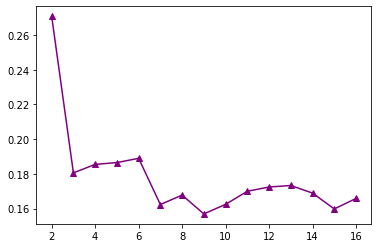

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n = []
score = []

for n_clusters in range(2,17):
    clusterer = KMeans(n_clusters, random_state = 0)
    preds = clusterer.fit_predict(df)
    n.append(n_clusters)
    score.append(silhouette_score(df, preds))
    
plt.plot(n,score,'^-', color="purple")

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters = 2, random_state = 0)
kmeans.fit(df)
silhouette_score(df, kmeans.fit_predict(df))

0.27077307417974517

Tutaj jak widać najlepsze wyniki silhouette score daje dla dwóch klastrów. Nie jest to jednak co prawda imponujący wynik bo wychodzi w okolicach ~0.27.

In [56]:
x = kmeans.predict(df)

In [57]:
rev = df['Revenue']
rev = np.asarray(rev)
rev = rev.astype(int)

In [58]:
x[x == 0] = 2
x[x == 1] = 0
x[x == 2] = 1

In [59]:
from sklearn import metrics

In [60]:
metrics.accuracy_score(rev, x)

0.7736415247364152

In [61]:
metrics.precision_score(rev, x)

0.2490051165434906

Całkiem ciekawe jest że przypisania przy dwóch klastrach mają 77% accuracy rate dla predykcji 'revenue'.  
Jednak jeśli weźmiemy pod uwagę niezbalansowanie klas i miarę precision to wyniki nie są już takie zadowalające.

### MiniBatch Kmeans

Zobaczymy jak radzi sobie zmodyfikowany algorytm Kmeans

In [62]:
from sklearn.cluster import MiniBatchKMeans

In [63]:
mbKmeans = MiniBatchKMeans(n_clusters=2)

In [64]:
mbKmeans.fit(df)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=2, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [65]:
pred = mbKmeans.predict(df)

In [66]:
pred

array([0, 0, 0, ..., 0, 0, 1])

In [67]:
silhouette_score(df, pred)

0.27141553663672974

### DBSCAN

In [68]:
from sklearn.cluster import DBSCAN

In [69]:
e = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3, 0.5]
score = []

for eps in e:
    clusterer = DBSCAN(eps)
    preds = clusterer.fit_predict(df)
    score.append(silhouette_score(df, preds))

([<matplotlib.axis.XTick at 0x25cc3ee5108>,
 <a list of 7 Text xticklabel objects>)

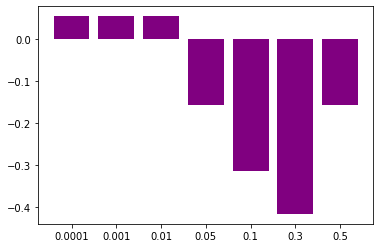

In [70]:
y_pos = np.arange(len(e))
plt.bar(y_pos, score, color='purple')
plt.xticks(y_pos, e)

Wygląda na to że DBSCAN średnio radzi sobie z tym datasetem.

In [71]:
dbscan = DBSCAN(eps=0.001)
dbscan.fit(df)

DBSCAN(algorithm='auto', eps=0.001, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [72]:
x1 = dbscan.labels_.astype(int)

In [73]:
np.unique(x1)

array([-1,  0,  1,  2,  3,  4,  5])

In [74]:
preds = dbscan.fit_predict(df)
silhouette_score(df, preds)

0.055169796020227216

Nawet w najlepszym przypadku wynik silhouette score jest bardzo niski.

### OPTICS

Zmodyfikowana wersja algorytmu DBSCAN.

In [77]:
from sklearn.cluster import OPTICS

In [78]:
opt = OPTICS(eps=0.001, min_samples=10)

In [79]:
opt_pred = opt.fit_predict(df)

In [80]:
np.unique(opt_pred)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67])

Jak optics również dzieli nasz zbiór danych na dużą liczbę klastrów, co w praktyce jest nieinterpretowalne.

## GMM

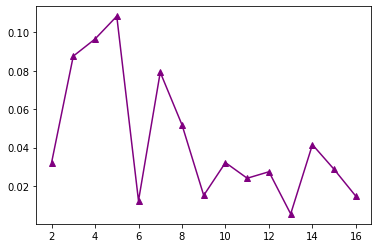

In [75]:
from sklearn import mixture

n = []
score = []

for n_clusters in range(2,17):
    clusterer = mixture.GaussianMixture(n_clusters, random_state = 0)
    preds = clusterer.fit_predict(df)
    n.append(n_clusters)
    score.append(silhouette_score(df, preds))
    
plt.plot(n,score,'^-', color="purple")

Jak widać dla GMM najlepszą ilością klastrów jest 5.

In [76]:
gmm = mixture.GaussianMixture(n_components=5, random_state = 0)
gmm.fit(df)
silhouette_score(df, gmm.fit_predict(df))

0.10836948713633238

Nie jest to jednak bardzo imponujący wynik. Wygląda na to że na razie KMeans dla dwóch klastrów spisuje się najlepiej.